In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

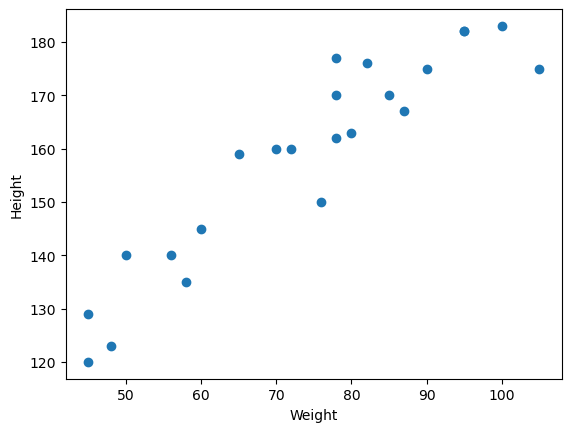

In [110]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [111]:
X=df[['Weight']]
Y=df['Height']

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [115]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)

In [116]:
reg.fit(X_train_scaled,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [117]:
reg.coef_ #how many different slope B1 in H(x) = B0+B1x

array([17.2982057])

In [118]:
reg.intercept_ #intercept B0

np.float64(156.47058823529412)

In [119]:
Y_pred=reg.predict(X_test_scaled)
print(Y_pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [120]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rsme=np.sqrt(mse)
print(mae)
print(mse)
print(rsme)

9.665125886795005
114.84069295228699
10.716374991212605


In [121]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.7360826717981276


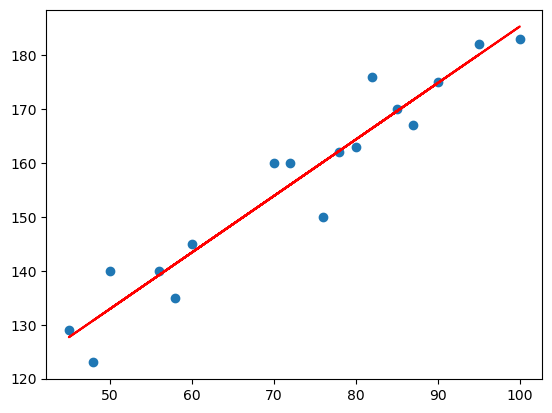

In [122]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,reg.predict(X_train_scaled),'r')

In [123]:
weight = 92

# Scale input properly before prediction
scaled_weight = Scaler.transform([[weight]])
predicted_height = reg.predict(scaled_weight)
print(f"Predicted height for weight {weight} kg = {predicted_height[0]:.2f} cm")

Predicted height for weight 92 kg = 176.94 cm


E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
reg.predict(Scaler.transform([[92
                              ]]))

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([176.93594758])

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


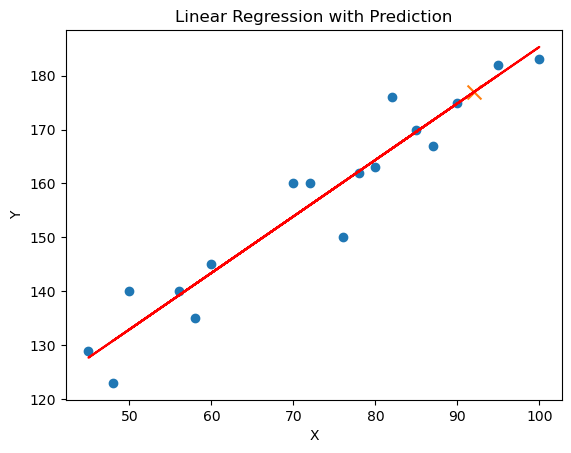

In [125]:
# scatter: actual training data
plt.scatter(X_train, Y_train)

# regression line
plt.plot(X_train, reg.predict(X_train_scaled), 'r')

# prediction for new value
x_new = 92
y_new = reg.predict(Scaler.transform([[x_new]]))

# plot predicted point
plt.scatter(x_new, y_new, marker='x', s=100)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression with Prediction")

plt.show()
